# Business Understanding
#### by Alir Adn Haqqu _ DS10

1. Monthly Sales Average
2. Most profitable Category
3. Most Profitable City
4. Most favourite Mode Shipping
5. Segmentation x Profit

# Data Understanding
#### 1. data from 2014-01-03 to 2017-12-30
#### 2.  data from https://www.kaggle.com/vivek468/superstore-dataset-final
#### 3. data dictionary
1. Row ID => Unique ID for each row.
2. Order ID => Unique Order ID for each Customer.
3. Order Date => Order Date of the product.
4. Ship Date => Shipping Date of the Product.
5. Ship Mode=> Shipping Mode specified by the Customer.
6. Customer ID => Unique ID to identify each Customer.
7. Customer Name => Name of the Customer.
8. Segment => The segment where the Customer belongs.
9. Country => Country of residence of the Customer.
10. City => City of residence of of the Customer.
11. State => State of residence of the Customer.
12. Postal Code => Postal Code of every Customer.
13. Region => Region where the Customer belong.
14. Product ID => Unique ID of the Product.
15. Category => Category of the product ordered.
16. Sub-Category => Sub-Category of the product ordered.
17. Product Name => Name of the Product
18. Sales => Sales of the Product.
19. Quantity => Quantity of the Product.
20. Discount => Discount provided.
21. Profit => Profit/Loss incurred.

# Data Preparation

## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read data

In [2]:
df = pd.read_csv('/Users/alirh/Documents/portofolio/Superstore.csv')

### Getting Info from the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Cheking Missing Value

In [5]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### Feature Enginering

In [7]:
# make the data columns as datetime datatype
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

#make columns year-month for order and ship
df['order_month_year'] = df['Order Date'].dt.to_period('M')
df['ship_month_year'] = df['Ship Date'].dt.to_period('M')

#Shipping Time
df['order_ship_time']= df['Ship Date'] - df['Order Date']

In [8]:
print(df['Order Date'].min())
print(df['Order Date'].max())

2014-01-03 00:00:00
2017-12-30 00:00:00


In [9]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_month_year,ship_month_year,order_ship_time
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11,2016-11,3 days
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11,2016-11,3 days
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06,2016-06,4 days
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10,2015-10,7 days
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10,2015-10,7 days


#### 1. Monthly Sales Average

In [10]:
#Make DataFrame for monthly sales
monthly_sales = pd.DataFrame(df.groupby('order_month_year')[['Quantity','Sales']].sum()).reset_index()

#Showing the first 5 row of data
monthly_sales.head()

,order_month_year,Quantity,Sales
0,2014-01,284,14236.895
1,2014-02,159,4519.892
2,2014-03,585,55691.009
3,2014-04,536,28295.345
4,2014-05,466,23648.287


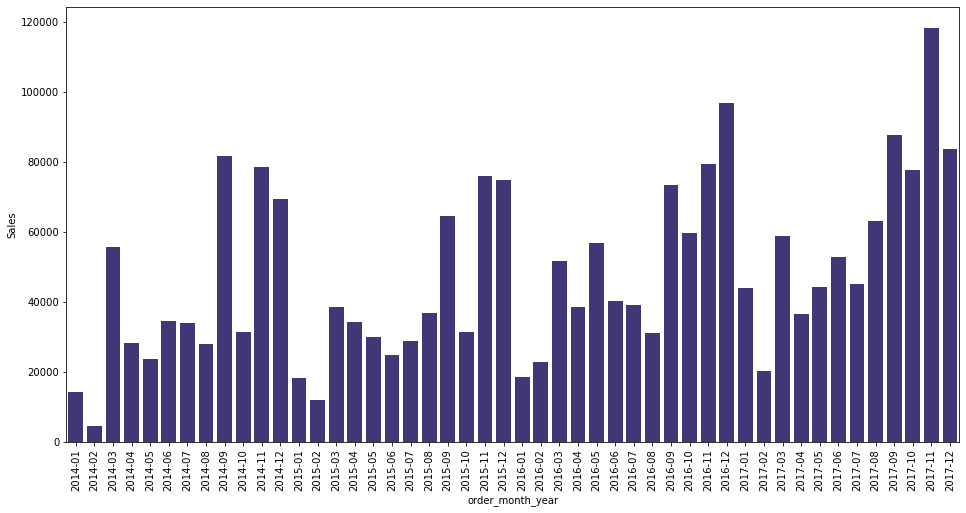

In [11]:
#Plot the profit per month
plt.figure(figsize=(16, 8))

#Set X= Date and y= Sales
sns.barplot(x = 'order_month_year', y = 'Sales',data = monthly_sales, color="#3A2D80")

#Make the X tick in vertical mode
plt.xticks(rotation=90)

#show the figure
plt.show()

#### 2. Most profitable Category

Text(0.5, 1.0, 'Composition of Category for Profit')

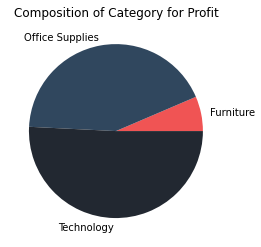

In [12]:
# Taking a subset of data 
df_pie = df[['Category','Sales','Profit']]
# taking a groupby on category and then ship mode...
df_pie = df_pie.groupby(['Category']).sum().reset_index()
plt.pie(df_pie['Profit'], labels=df_pie['Category'], colors=['#F05454','#30475E','#222831','#DDDDDD'])
plt.title("Composition of Category for Profit")


#### 3. Most Profitable City

In [13]:
# group by aggregation
top10_city = (df
            .groupby('City')
            .agg(top_city=('Profit','sum'))
            .reset_index()
            .sort_values('top_city',ascending=False)
            .head(10)
            )

top10_city

,City,top_city
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


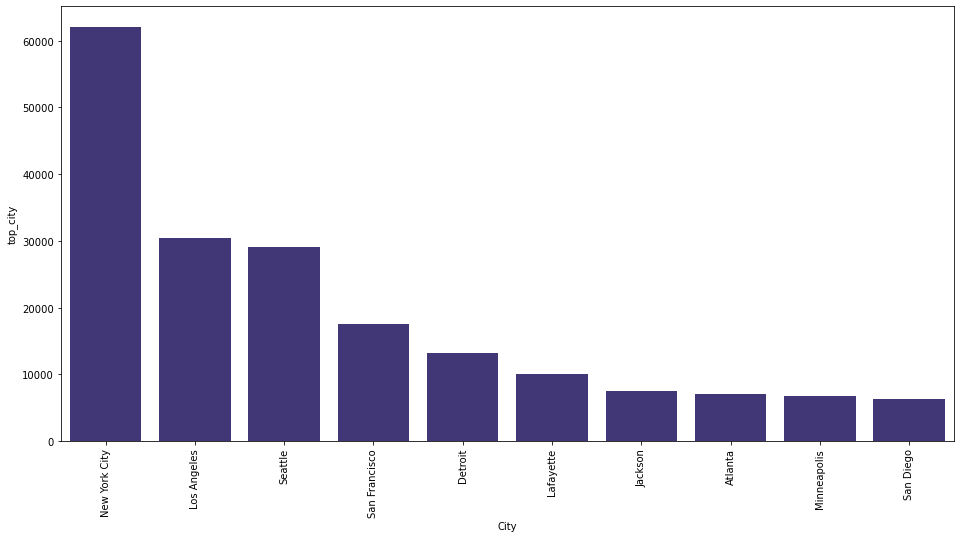

In [14]:
#Plot the profit per month
plt.figure(figsize=(16, 8))

#Set X= Date and y= Sales
sns.barplot(x = 'City', y = 'top_city',data = top10_city, color="#3A2D80")

#Make the X tick in vertical mode
plt.xticks(rotation=90)

#show the figure
plt.show()

#### 4. Most favourite Mode Shipping

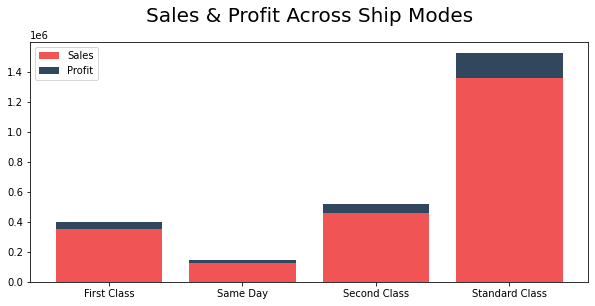

In [15]:
# Taking a subset of data 
df_stackb = df[['Ship Mode','Sales','Profit']]
# taking a groupby on category and then ship mode...
df_stackb = df_stackb.groupby(['Ship Mode']).sum().reset_index()

# Visualizing the Stacked BarChart
plt.figure(figsize=[10,15])
plt.subplot(3,1,1)
plt.bar(x=df_stackb['Ship Mode'], height=df_stackb['Sales'], color='#F05454')
plt.bar(x=df_stackb['Ship Mode'], height=df_stackb['Profit'], bottom=df_stackb['Sales'], color='#30475E')
plt.title("Sales & Profit Across Ship Modes", size=20, pad=20)
plt.legend(['Sales','Profit'])



#### 5. Segmentation x Profit

Text(0.5, 1.0, 'Composition of Segment for Profit')

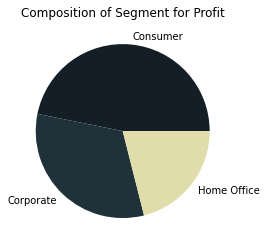

In [16]:
# Taking a subset of data 
df_pie2 = df[['Segment','Sales','Profit']]
# taking a groupby on Segment and then ship mode
df_pie2 = df_pie2.groupby(['Segment']).sum().reset_index()
plt.pie(df_pie2['Profit'], labels=df_pie2['Segment'], colors=['#141E27','#203239','#E0DDAA','#DDDDDD'])
plt.title("Composition of Segment for Profit")

# Modelling (Profit)

In [17]:
new_cols = ['Ship Mode', 'Segment', 'Category', 'Sub-Category', 'Quantity', 'Discount', 'Profit','Sales']
model_df = df[new_cols]

model_df

,Ship Mode,Segment,Category,Sub-Category,Quantity,Discount,Profit,Sales
0,Second Class,Consumer,Furniture,Bookcases,2,0.00,41.9136,261.9600
1,Second Class,Consumer,Furniture,Chairs,3,0.00,219.5820,731.9400
2,Second Class,Corporate,Office Supplies,Labels,2,0.00,6.8714,14.6200
3,Standard Class,Consumer,Furniture,Tables,5,0.45,-383.0310,957.5775
4,Standard Class,Consumer,Office Supplies,Storage,2,0.20,2.5164,22.3680
...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Furniture,Furnishings,3,0.20,4.1028,25.2480
9990,Standard Class,Consumer,Furniture,Furnishings,2,0.00,15.6332,91.9600
9991,Standard Class,Consumer,Technology,Phones,2,0.20,19.3932,258.5760
9992,Standard Class,Consumer,Office Supplies,Paper,4,0.00,13.3200,29.6000


In [18]:
X = model_df.loc[:, :'Profit'].copy()
y = model_df.loc[:, 'Sales'].copy() 

In [19]:
X_FE = X.copy()

for col in X_FE.select_dtypes("object"):
    X_FE[col], _ = X_FE[col].factorize()

In [20]:
X_FE

,Ship Mode,Segment,Category,Sub-Category,Quantity,Discount,Profit
0,0,0,0,0,2,0.00,41.9136
1,0,0,0,1,3,0.00,219.5820
2,0,1,1,2,2,0.00,6.8714
3,1,0,0,3,5,0.45,-383.0310
4,1,0,1,4,2,0.20,2.5164
...,...,...,...,...,...,...,...
9989,0,0,0,5,3,0.20,4.1028
9990,1,0,0,5,2,0.00,15.6332
9991,1,0,2,7,2,0.20,19.3932
9992,1,0,1,10,4,0.00,13.3200


Text(0.5, 1.0, 'Visualitation Raw Data')

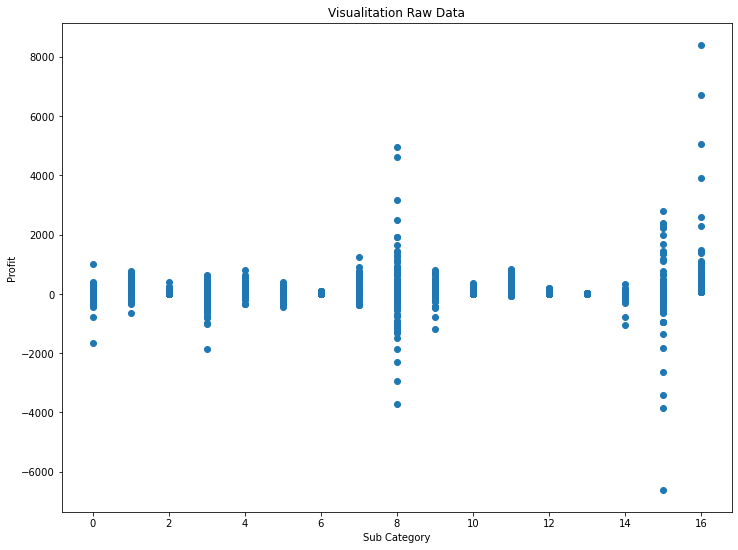

In [35]:
plt.figure(figsize=(12,9))
plt.scatter(X_FE.iloc[:,3], X_FE.iloc[:,6])
plt.xlabel('Sub Category')
plt.ylabel('Profit')
plt.title('Visualitation Raw Data')

## Standarization

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_FE)

## PCA

In [33]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [34]:
pca.explained_variance_ratio_

array([0.23400195, 0.17018929, 0.14509584, 0.14325819, 0.14049502,
       0.10906503, 0.05789469])

The attribute show how much variance is explained by each of 7 individual components

Text(0.5, 1.0, 'Explained Variance by Component ')

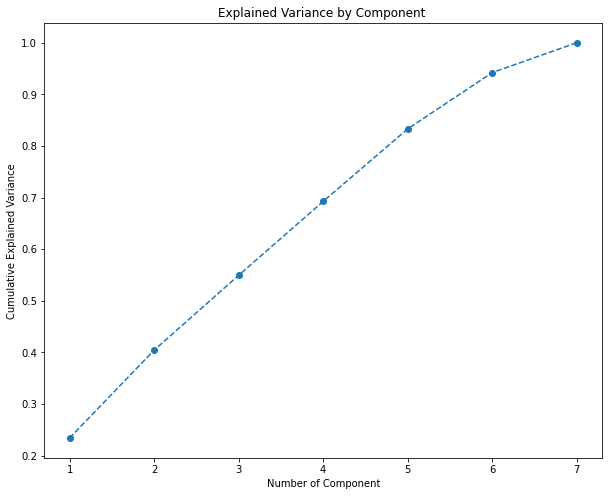

In [46]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 8), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Component')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Component ')

The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 5 components.

#### fit the model with selected number component (5)

In [47]:
pca = PCA(n_components = 5)

In [48]:
pca.fit(X_pca)

PCA(n_components=5)

#### calculated resulting components scores for the elements in our data set

In [50]:
score_pca = pca.transform(X_pca)

# K-means Clustering with PCA

In [57]:
from sklearn.cluster import KMeans
WCSS = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++')
    kmeans_pca.fit(score_pca)
    WCSS.append(kmeans_pca.inertia_)

#### Plotting the WCSS VS Number of components

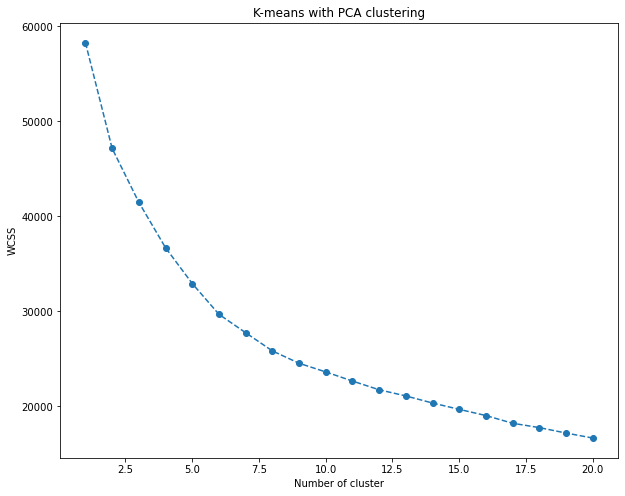

In [59]:
plt.figure(figsize=(10,8))
plt.plot(range(1,21), WCSS, marker = 'o', linestyle = '--')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.title('K-means with PCA clustering')
plt.show()

And from this graph, we determine the number of clusters we’d like to keep. To that effect, we use the Elbow-method. In this instance, the kink comes at the 6 clusters mark. So, we’ll be keeping a six-cluster solution.

run model with number of cluster equal six

In [60]:
kmeans_pca = KMeans(n_clusters = 6, init = 'k-means++')

fit data with k-means pca model

In [61]:
kmeans_pca.fit(score_pca)

KMeans(n_clusters=6)

## K-means clustering with PCA Results

create new data frame with original data with add the pca score and assigned clusters

In [67]:
df_segm_pca_kmeans = pd.concat([X_FE.reset_index(drop = True), pd.DataFrame(score_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-5:] = ['Component 1','Component 2','Component 3','Component 4','Component 5']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [66]:
df_segm_pca_kmeans.head()

,Ship Mode,Segment,Category,Sub-Category,Quantity,Discount,Profit,Component 1,Component 2,Component 3,Component 4,Component 5,Segment K-means PCA
0,0,0,0,0,2,0.00,41.9136,-2.296382,1.219710,0.259375,-1.615572,-0.987336,5
1,0,0,0,1,3,0.00,219.5820,-1.912284,1.740084,0.517738,-1.421111,-0.648093,5
2,0,1,1,2,2,0.00,6.8714,-0.832500,0.793132,0.104436,-0.535203,-1.697054,5
3,1,0,0,3,5,0.45,-383.0310,-2.545140,-1.434589,0.930296,-0.206943,0.583591,0
4,1,0,1,4,2,0.20,2.5164,-0.677859,-0.247563,-0.299217,-1.069161,-0.001365,1


create column 'segment' and map 6 cluster

In [75]:
df_segm_pca_kmeans['segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'First',
                                                                             1:'Second',
                                                                             2:'Third',
                                                                             3:'Fourth',
                                                                             4:'Fifth',
                                                                             5:'Sixth'})

# Visualize the segmet with respect to the first two components

C:\Users\alirh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


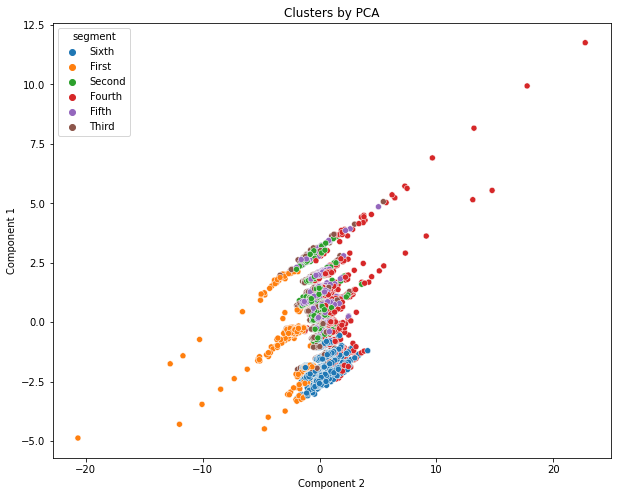

In [76]:
#plot data by PCA components. y axis is first component, x avis is second 
x_axis = df_segm_pca_kmeans['Component 2'] 
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis, hue = df_segm_pca_kmeans['segment'])
plt.title('Clusters by PCA')
plt.show()